In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('supermercado.csv', sep=',')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

### Limpando os Registros Nulos

In [5]:
data = data.dropna()
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### Entendendo os Dados por Cidade

Total de Vendas por Cidade

In [6]:
total_por_cidade = data['Total'].groupby(data['City']).sum()
total_por_cidade.head()

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

Quantidade Vendida por Linha de Produtos por Cidade

In [7]:
vendas_por_setor = data['Quantity'].groupby([data['Product line'], data['City']]).sum()
vendas_por_setor.head(100)

Product line            City     
Electronic accessories  Mandalay     316
                        Naypyitaw    333
                        Yangon       322
Fashion accessories     Mandalay     297
                        Naypyitaw    342
                        Yangon       263
Food and beverages      Mandalay     270
                        Naypyitaw    369
                        Yangon       313
Health and beauty       Mandalay     320
                        Naypyitaw    277
                        Yangon       257
Home and lifestyle      Mandalay     295
                        Naypyitaw    245
                        Yangon       371
Sports and travel       Mandalay     322
                        Naypyitaw    265
                        Yangon       333
Name: Quantity, dtype: int64

### Entendendo os Dados por Gênero

Quantidade de Vendas por Gênero por Cidade

In [8]:
por_genero = data['Invoice ID'].groupby([data['Gender'], data['City']]).count()
por_genero

Gender  City     
Female  Mandalay     162
        Naypyitaw    178
        Yangon       161
Male    Mandalay     170
        Naypyitaw    150
        Yangon       179
Name: Invoice ID, dtype: int64

Quantidade de Vendas por Gênero por Linha de Produtos

In [9]:
setor_genero = data['Quantity'].groupby([data['Product line'], data['Gender']]).sum()
setor_genero

Product line            Gender
Electronic accessories  Female    488
                        Male      483
Fashion accessories     Female    530
                        Male      372
Food and beverages      Female    514
                        Male      438
Health and beauty       Female    343
                        Male      511
Home and lifestyle      Female    498
                        Male      413
Sports and travel       Female    496
                        Male      424
Name: Quantity, dtype: int64

### Ordenando os Dados por Data das Vendas  

In [13]:
ord_data = data.sort_values(by='Date')
ord_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,8.5
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,1/1/2019,19:48,Credit card,369.80,4.761905,18.490,7.0
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,1/1/2019,11:43,Cash,125.74,4.761905,6.287,5.0
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.30,4.761905,42.315,9.0


In [17]:
ord_data = ord_data.reset_index()

In [19]:
ord_data = ord_data.drop(['index'], axis = 1)
ord_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.3220,132.7620,1/1/2019,15:51,Cash,126.44,4.761905,6.3220,8.5
1,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.4900,388.2900,1/1/2019,19:48,Credit card,369.80,4.761905,18.4900,7.0
2,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.5830,621.2430,1/1/2019,13:55,Cash,591.66,4.761905,29.5830,7.7
3,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.2870,132.0270,1/1/2019,11:43,Cash,125.74,4.761905,6.2870,5.0
4,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.3150,888.6150,1/1/2019,11:36,Credit card,846.30,4.761905,42.3150,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,308-47-4913,A,Yangon,Member,Female,Sports and travel,52.26,10,26.1300,548.7300,3/9/2019,12:45,Credit card,522.60,4.761905,26.1300,6.2
996,841-35-6630,C,Naypyitaw,Normal,Female,Electronic accessories,75.91,6,22.7730,478.2330,3/9/2019,18:21,Cash,455.46,4.761905,22.7730,8.7
997,616-87-0016,B,Mandalay,Normal,Male,Fashion accessories,95.54,7,33.4390,702.2190,3/9/2019,14:36,Credit card,668.78,4.761905,33.4390,9.6
998,127-47-6963,A,Yangon,Normal,Male,Health and beauty,51.71,4,10.3420,217.1820,3/9/2019,13:53,Credit card,206.84,4.761905,10.3420,9.8


In [20]:
for i in ord_data.index:
    if i == 0:
        ord_data.loc[i, 'Quantidade_Total'] = ord_data.loc[i, 'Quantity']
    else:
        ord_data.loc[i, 'Quantidade_Total'] = ord_data.loc[i, 'Quantity'] + ord_data.loc[i-1, 'Quantidade_Total']

ord_data.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Quantidade_Total
0,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,8.5,2.0
1,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,1/1/2019,19:48,Credit card,369.80,4.761905,18.490,7.0,12.0
2,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7,21.0
3,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,1/1/2019,11:43,Cash,125.74,4.761905,6.287,5.0,23.0
4,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.30,4.761905,42.315,9.0,33.0


#### Gráfico de Quantidade de Vendas por Data

<AxesSubplot:xlabel='Data', ylabel='Quantidade Vendida'>

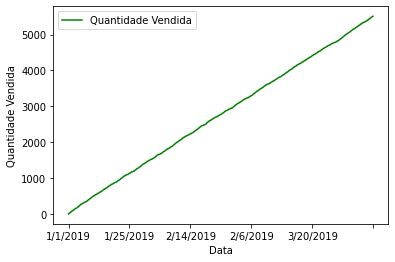

In [21]:
import matplotlib.pyplot as plt

ord_data.plot(x='Date', y='Quantidade_Total', color='green', label='Quantidade Vendida', xlabel='Data', ylabel='Quantidade Vendida')

In [26]:
ord_data.loc[(ord_data['Date'] >='2019-01-01') & (ord_data['Date'] <='2019-12-31')]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Quantidade_Total
